In [5]:
##importing file
import pandas as np
data=np.read_csv(r"C:\Users\USER\Downloads\archive (10)\netflix price in different countries.csv")
data

pandas.core.frame.DataFrame

In [6]:
##checking the correlation
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_1360\222290747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
No. of TV Shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
No. of Movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
Cost Per Month - Basic ($),-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
Cost Per Month - Standard ($),-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
Cost Per Month - Premium ($),-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


In [11]:
##using cost per month-standard and cost per month-premium
data=data[['Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]
data
x=data['Cost Per Month - Standard ($)']
y=data['Cost Per Month - Premium ($)']

Text(0, 0.5, 'Cost Per Month - Premium ($)')

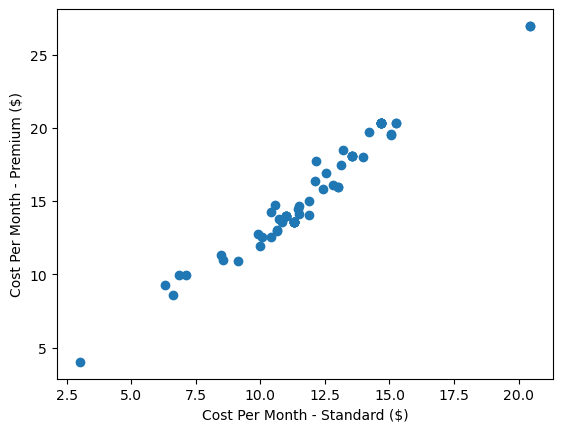

In [51]:
##creating a scatter plot to show correlation
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Cost Per Month - Standard ($)')
plt.ylabel('Cost Per Month - Premium ($)')


<Axes: >

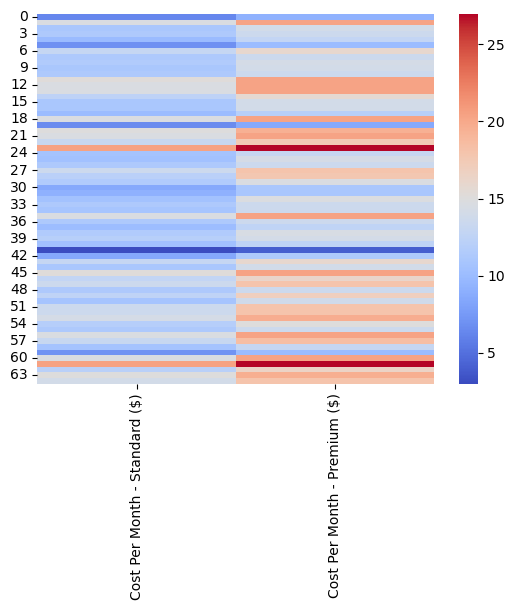

In [19]:
##heat map to show correlation
import seaborn as sns
sns.heatmap(data,cmap='coolwarm')

In [26]:
##splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.4,random_state=1)

In [44]:
##converting data to 2-dimensional
import numpy as np
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)

In [31]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression

LinearRegression()

In [35]:
##fitting the data
linear_regression.fit(x_train,y_train)
linear_regression.coef_

array([1.33601735])

In [36]:
linear_regression.intercept_

-0.1944873589783942

In [41]:
##predicted premium cost using train data
y_pred_test=linear_regression.predict(x_train)
y_pred_test

array([19.40488713, 15.66403856, 16.54581001, 14.28794069,  3.81356468,
       17.89518753, 19.40488713, 19.40488713, 17.34742042, 13.94057618,
       11.24182114, 15.12963162, 27.14042758, 13.04544456, 16.3988481 ,
       15.15635197, 16.06484377, 11.1082194 ,  9.30459598, 14.8891485 ,
       19.40488713, 18.49639534, 19.91257373, 13.74017358, 17.16037799,
       20.16641702, 14.8891485 , 15.9980429 , 19.40488713, 14.48834329,
        8.22242193, 14.48834329,  8.97059165, 20.16641702, 14.48834329,
       15.15635197, 19.40488713, 17.16037799, 13.23248699])

In [45]:
##predicted premium cost using test data
y_pred_test=linear_regression.predict(x_test)
y_pred_test

array([17.89518753, 14.8891485 , 16.91989487, 14.48834329, 17.89518753,
       18.77695898, 19.40488713, 14.8891485 , 14.48834329, 13.74017358,
       14.8891485 , 15.70411908, 19.89921355, 19.40488713, 17.89518753,
       14.04745757, 14.11425844, 14.8891485 , 12.0167112 , 14.0340974 ,
       14.8891485 , 17.44094163,  8.63658731, 14.8891485 , 27.14042758,
       13.16568612])

Text(0.5, 1.0, 'Train data')

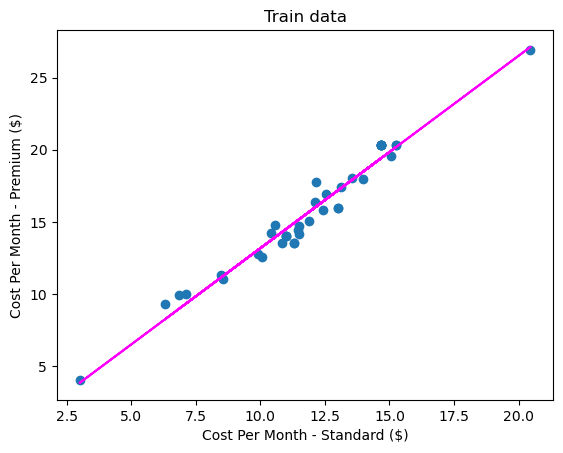

In [56]:
##plotting linear regression for test data
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color='magenta')
plt.xlabel('Cost Per Month - Standard ($)')
plt.ylabel('Cost Per Month - Premium ($)')
plt.title('Train data')

##plotting linear regression for test data
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,y_pred_test,color='green')
plt.xlabel('Cost Per Month - Standard ($)')
plt.ylabel('Cost Per Month - Premium ($)')
plt.title('Test data')

In [59]:
##comparing predicted y values to actual y values
expected=y_test
for p, e in zip(y_pred_test[::], expected[::]):
    print(f'predicted:{p:.2f}, expected: {e:.2f}')

predicted:17.90, expected: 18.06
predicted:14.89, expected: 13.54
predicted:16.92, expected: 16.11
predicted:14.49, expected: 13.99
predicted:17.90, expected: 18.06
predicted:18.78, expected: 19.70
predicted:19.40, expected: 20.32
predicted:14.89, expected: 13.54
predicted:14.49, expected: 13.99
predicted:13.74, expected: 12.52
predicted:14.89, expected: 13.54
predicted:15.70, expected: 14.07
predicted:19.90, expected: 19.60
predicted:19.40, expected: 20.32
predicted:17.90, expected: 18.06
predicted:14.05, expected: 12.96
predicted:14.11, expected: 13.78
predicted:14.89, expected: 13.54
predicted:12.02, expected: 10.93
predicted:14.03, expected: 13.02
predicted:14.89, expected: 13.54
predicted:17.44, expected: 18.48
predicted:8.64, expected: 8.60
predicted:14.89, expected: 13.54
predicted:27.14, expected: 26.96
predicted:13.17, expected: 11.93


In [64]:
##testing accuracy of model using r-squared
from sklearn.metrics import r2_score
r_squared=r2_score(expected,y_pred_test)
r_squared

0.9333983193063389

In [71]:
##calculating mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected, y_pred_test)
mse


0.9644218934031007